# Determining $\Sigma_{10}$ & $R_{10}$ for DESIJ1537+1443

Author(s): Md. Mehedi Hasan, Sulyman Hossain, Anowar Shajib\
Acknowledgement(s): Rafee Adnan, Ahmad Al - Imtiaz, Mamunur Rashid

In [1]:
!pip install pandas
!pip install yaml
!pip install astropy
!pip install photutils

ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00


## Load data

In [2]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ15371443_F140W_drz_sci.fits", header=True
)

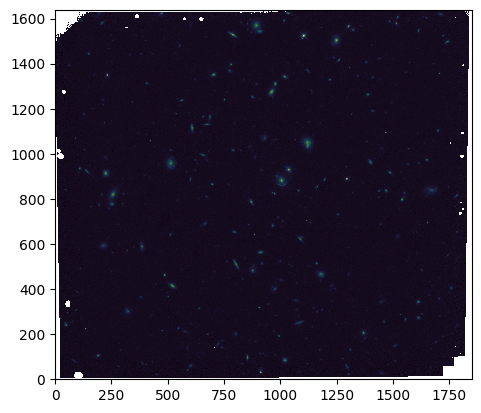

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

In [5]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)

/tmp/ipykernel_17/1236197877.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/1236197877.py:2: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


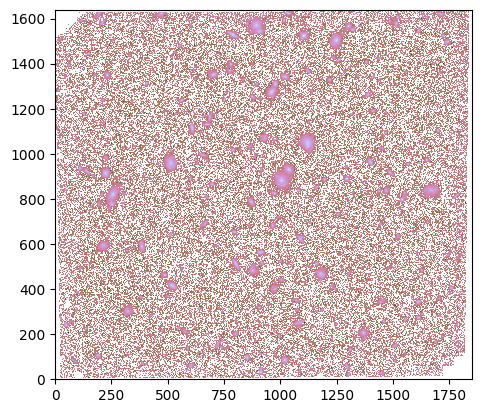

In [6]:
plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture photometry

In [7]:
np.median(bkg.background), np.median(bkg.background_rms)

(0.2555126, 0.012066942)

In [8]:
bkg_subtracted_data = data - bkg.background

In [9]:
threshold = 5 * bkg.background_rms

In [10]:
segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)

In [11]:
segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=10,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)

In [12]:
finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(bkg_subtracted_data, threshold)

print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (1640, 1849)
nlabels: 524
labels: [  1   2   3   4   5 ... 520 521 522 523 524]


In [13]:
cat = SourceCatalog(bkg_subtracted_data, segm_deblend)
print(cat)
print(type(cat))

<photutils.segmentation.catalog.SourceCatalog>
Length: 524
labels: [  1   2   3   4   5 ... 520 521 522 523 524]
<class 'photutils.segmentation.catalog.SourceCatalog'>


## Adjust the region near your lensing system

In [14]:
set_x_lim1, set_x_lim2 = 500, 1500
set_y_lim1, set_y_lim2 = 600, 1350

/tmp/ipykernel_17/2085321793.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/2085321793.py:5: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


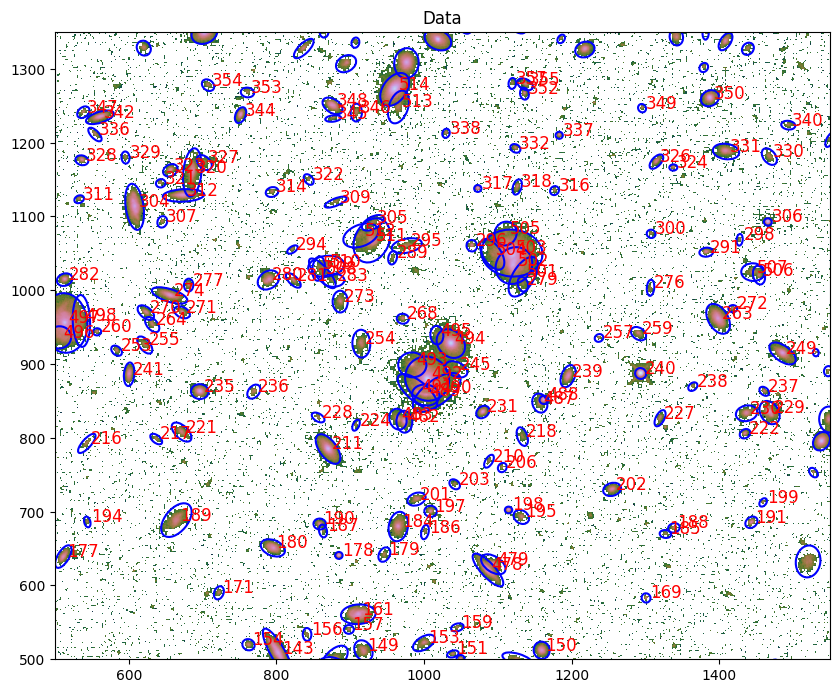

In [15]:
norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)


for i in range(len(cat)):
    # cat.xcentroid[492]
    # cat.ycentroid[492]
    if np.abs(cat.xcentroid[i] - 1000) < 500 and np.abs(cat.ycentroid[i] - 900) < 400:
        ax1.text(
            cat.xcentroid[i] + 5,
            cat.ycentroid[i],
            f"{i}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )
# cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5);

ax1.set_xlim(set_x_lim1, set_x_lim2 + 50)
ax1.set_ylim(set_y_lim1 - 100, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

## Determine the central deflector's ID

/tmp/ipykernel_17/125166765.py:13: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/125166765.py:13: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


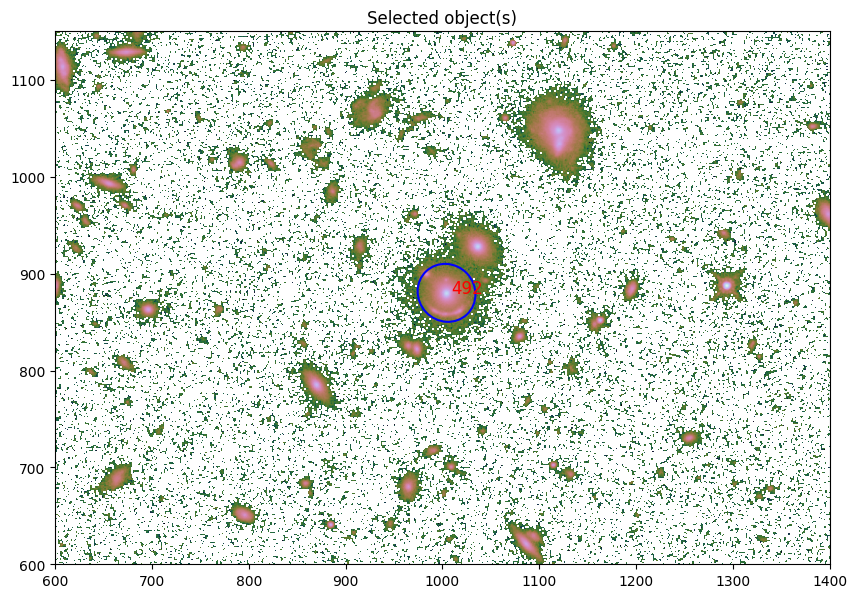

In [16]:
# object id of your central deflector/lens
id_central = 492


def label_selected_objects(selected_ids):
    # Background subtraction
    data - bkg.background

    # Plotting
    simple_norm(data, "sqrt")
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )
    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects
    for obj_id in selected_ids:
        labels = [obj_id + 1]
        cat_subset = cat.get_labels(labels)
        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits
    ax1.set_xlim(set_x_lim1 + 100, set_x_lim2 - 100)
    ax1.set_ylim(set_y_lim1, set_y_lim2 - 200)

    # Hide text outside of the axes
    ax1.set_clip_on(True)
    ax1.set_clip_box(ax1.bbox)

    # Show the plot
    plt.show()


label_selected_objects([id_central])

In [17]:
tbl = cat.to_table()
tbl["xcentroid"].info.format = ".2f"  # optional format
tbl["ycentroid"].info.format = ".2f"
tbl["kron_flux"].info.format = ".2f"

## Creating List of neighbouring Galaxies

In [18]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_all = []
dist_galaxies_all = []
flux_galaxies_all = []
axis_ratios_all = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 20 / 0.08:
        close_galaxies_all.append(i)
        flux_galaxies_all.append(f)
        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))

print(
    "Number of all close galaxies within 20 arcsecond radius:", len(close_galaxies_all)
)

Number of all close galaxies within 20 arcsecond radius: 52


In [19]:
# close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_1 = []
dist_galaxies_1 = []
flux_galaxies_1 = []
axis_ratios_1 = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 20 / 0.08) & (f > f0 * 0.01):
        close_galaxies_1.append(i)
        flux_galaxies_1.append(f)
        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of close galaxies excluding dim sources within 20 arcsecond radius:",
    len(close_galaxies_1),
)

Number of close galaxies excluding dim sources within 20 arcsecond radius: 42


In [20]:
def distance_parsec(pixel_distance, z):
    """Convert distance from unit of pixels into parsec unit.

    :param pixel_distance: distance in unit of pixels

    :param z: photometric redshift

    :return: distance in parsec unit

    """

    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel
    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert the pixel scale from degrees to radians
    pix_scale_radian = pix_scale_deg * np.pi / 180

    # Angles in radians
    angles_radian = pixel_distance * pix_scale_radian

    # Define cosmological parameters
    H0 = 70  # Hubble constant in km/s/Mpc
    Om0 = 0.3  # Matter density parameter
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

    # Compute the angular diameter distance
    angular_diameter_distance = cosmo.angular_diameter_distance(z)

    # Calculate the physical distance
    physical_distances_mpc = angular_diameter_distance * angles_radian

    return physical_distances_mpc

## Unwanted Objects

/tmp/ipykernel_17/125166765.py:13: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/125166765.py:13: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


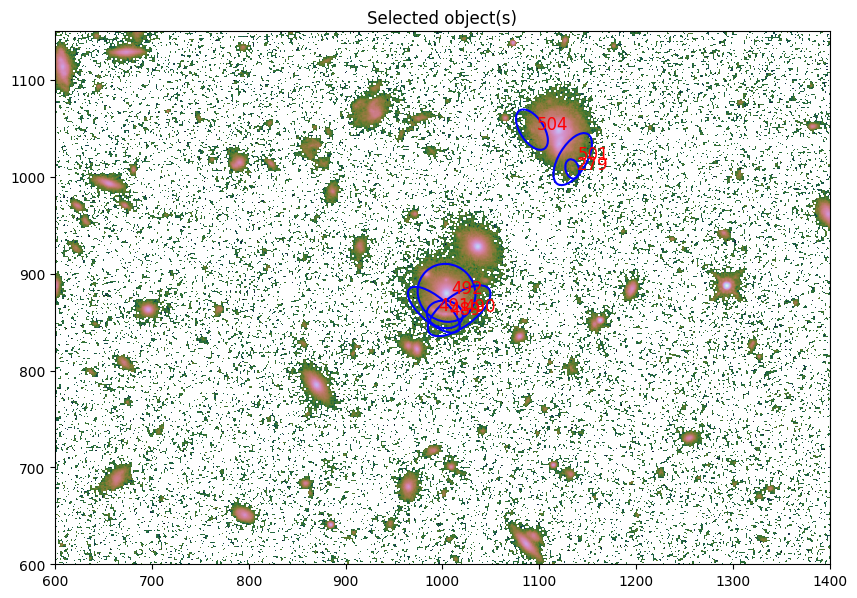

In [21]:
"""
Object with index 492 corresponds to our lens system, and
indices 489, 490, and 491 represent lensed arcs. On the other hand,
objects at indices 279, 501, and 504 are artefacts and
we intend to eliminate all of them from analysis.
"""

remove_list = [492, 490, 489, 279, 501, 504, 491]
label_selected_objects(remove_list)

## Removing the unwanted objects from the neighboring galaxy list

In [22]:
remove_list = [
    492,
    490,
    489,
    279,
    501,
    504,
    491,
    494,
    231,
    482,
    254,
    488,
    273,
    197,
    511,
    184,
]
df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})

df_all.set_index(pd.Index(close_galaxies_all), inplace=True)

# Photometric redshift of the deflector galaxy is 0.653
df_all["Distance(megaparsec)"] = distance_parsec(df_all["Distance(pixels)"], 0.653)
df_all["Flux"] = flux_galaxies_all
df_all["Axis Ratio"] = axis_ratios_all

# Sort the DataFrame based on 'Distance'
df_all_sorted = df_all.sort_values(by="Distance(pixels)")

# Exclude unwanted sources
df_all_sys_removed = df_all_sorted.drop(remove_list)

# first 20 galaxies
df_all_20 = df_all_sys_removed.iloc[:20]

print(df_all_20.shape)
print(df_all_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)        Flux  Axis Ratio
493         27.450955              0.015247   59.500330    0.879821
245         41.464015              0.023031   15.825891    0.612749
495         60.363967              0.033528   11.698630    0.698588
483         67.642369              0.037571   28.428839    0.797171
268         87.609068              0.048661    6.883718    0.827438
224        115.087705              0.063924    2.675213    0.529625
210        139.788114              0.077644    3.237036    0.496466
203        147.891034              0.082144    3.116745    0.736578
218        150.958117              0.083848    6.830181    0.521050
487        156.250228              0.086787   16.430336    0.754941
228        156.747617              0.087064    3.411893    0.559034
206        157.731468              0.087610    2.322412    0.847393
201        163.790465              0.090975   14.705960    0.651256
211        164.608187              0.091

In [23]:
# Excluding galaxies lower than 1% of the central deflector
df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})
df_1.set_index(pd.Index(close_galaxies_1), inplace=True)

# Photometric redshift of the deflector galaxy is 0.653
df_1["Distance(megaparsec)"] = distance_parsec(df_1["Distance(pixels)"], 0.653)
df_1["Flux"] = flux_galaxies_1
df_1["Axis Ratioe"] = axis_ratios_1

# Sort the DataFrame based on 'Distance'
df_1_sorted = df_1.sort_values(by="Distance(pixels)")

# Exclude the lensing system members
df_1_sys_removed = df_1_sorted.drop(remove_list)

# first 20 galaxies
df_1_20 = df_1_sys_removed.iloc[:20]

print(df_1_20.shape)
print(df_1_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)        Flux  Axis Ratioe
493         27.450955              0.015247   59.500330     0.879821
245         41.464015              0.023031   15.825891     0.612749
495         60.363967              0.033528   11.698630     0.698588
483         67.642369              0.037571   28.428839     0.797171
268         87.609068              0.048661    6.883718     0.827438
218        150.958117              0.083848    6.830181     0.521050
487        156.250228              0.086787   16.430336     0.754941
201        163.790465              0.090975   14.705960     0.651256
211        164.608187              0.091430  177.221009     0.496785
295        182.263738              0.101236   14.675543     0.457969
283        183.989422              0.102195    7.096941     0.605808
296        190.040427              0.105556    8.714946     0.920263
239        190.955687              0.106064   48.026570     0.571243
502        193.190982     

## Determining Sigma 10, 20 and R 10, 20

/tmp/ipykernel_17/1729084927.py:17: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1729084927.py:17: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1729084927.py:20: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1729084927.py:20: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1729084927.py:23: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1729084927.py:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower",

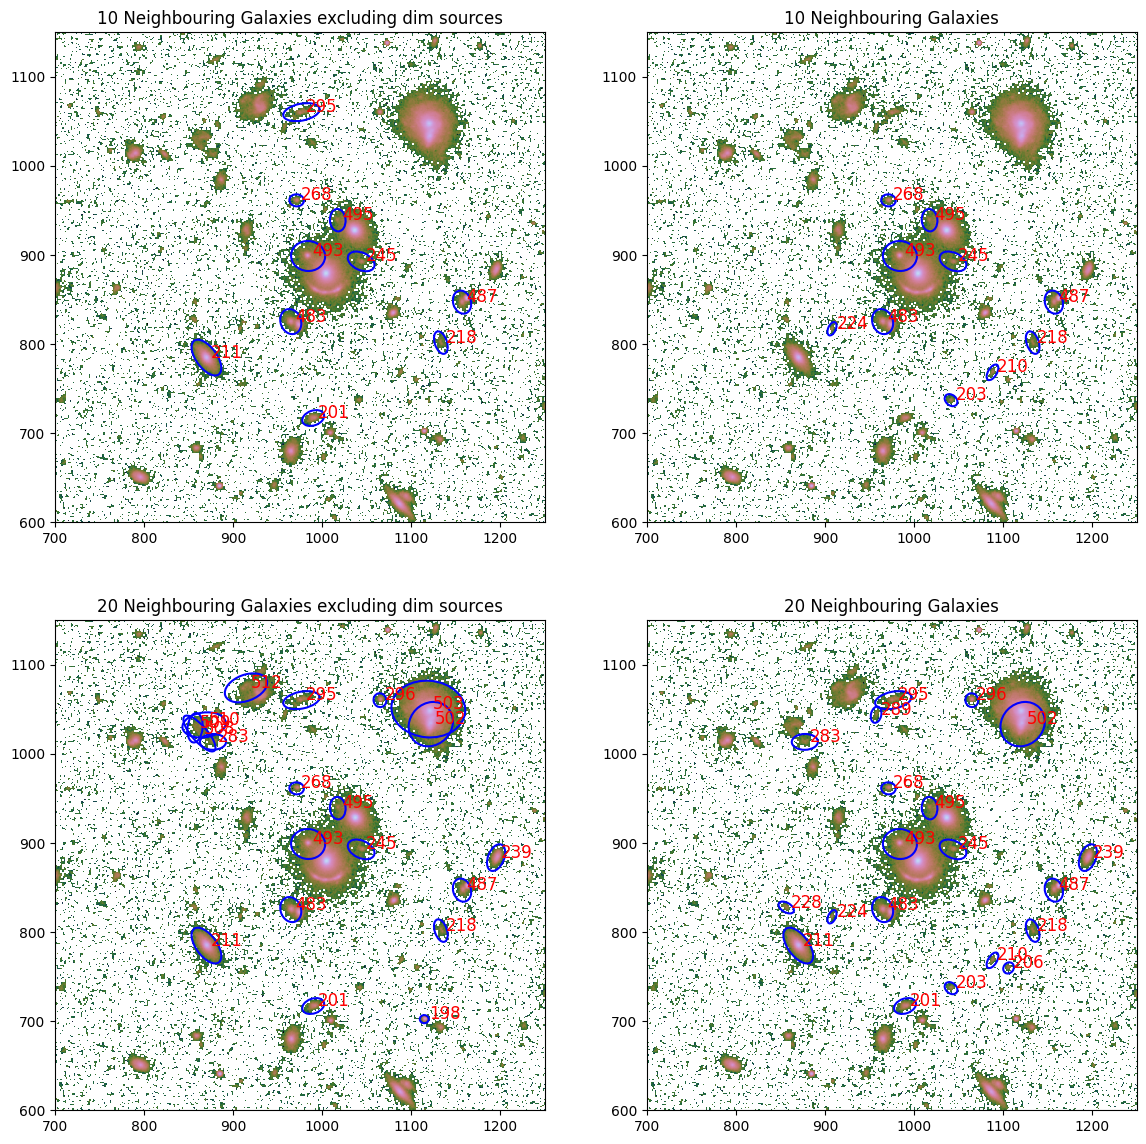

In [24]:
close_ids_all = list(df_all_20.index.values)
close_ids_all_10 = close_ids_all[:10]

updated_close_ids_all = [s + 1 for s in close_ids_all]
updated_close_ids_all_10 = updated_close_ids_all[:10]

close_ids_1 = list(df_1_20.index.values)
close_ids_1_10 = close_ids_1[:10]

updated_close_ids_1 = [s + 1 for s in close_ids_1]
updated_close_ids_1_10 = updated_close_ids_1[:10]

norm = simple_norm(data, "sqrt")
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # , figsize=(10, 12.5)

axs[0, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[0, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)
cat_subset_1_10.plot_kron_apertures(ax=axs[0, 0], color="blue", lw=1.5)

cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)
cat_subset_all_10.plot_kron_apertures(ax=axs[0, 1], color="blue", lw=1.5)

cat_subset_all = cat.get_labels(updated_close_ids_1)
cat_subset_all.plot_kron_apertures(ax=axs[1, 0], color="blue", lw=1.5)

cat_subset_1 = cat.get_labels(updated_close_ids_all)
cat_subset_1.plot_kron_apertures(ax=axs[1, 1], color="blue", lw=1.5)

axs[0, 0].set_title("10 Neighbouring Galaxies excluding dim sources")
axs[0, 1].set_title("10 Neighbouring Galaxies")
axs[1, 0].set_title("20 Neighbouring Galaxies excluding dim sources")
axs[1, 1].set_title("20 Neighbouring Galaxies")

for i in close_ids_1_10:
    axs[0, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all_10:
    axs[0, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_1:
    axs[1, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all:
    axs[1, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

axs[0, 0].set_xlim(set_x_lim1 + 200, set_x_lim2 - 250)
axs[0, 0].set_ylim(set_y_lim1, set_y_lim2 - 200)

axs[0, 1].set_xlim(set_x_lim1 + 200, set_x_lim2 - 250)
axs[0, 1].set_ylim(set_y_lim1, set_y_lim2 - 200)

axs[1, 0].set_xlim(set_x_lim1 + 200, set_x_lim2 - 250)
axs[1, 0].set_ylim(set_y_lim1, set_y_lim2 - 200)

axs[1, 1].set_xlim(set_x_lim1 + 200, set_x_lim2 - 250)
axs[1, 1].set_ylim(set_y_lim1, set_y_lim2 - 200)

# hide all text outside of the axes
axs[0, 0].set_clip_on(True)
axs[0, 0].set_clip_box(axs[0, 0].bbox)

axs[0, 1].set_clip_on(True)
axs[0, 1].set_clip_box(axs[0, 0].bbox)

axs[1, 0].set_clip_on(True)
axs[1, 0].set_clip_box(axs[0, 0].bbox)

axs[1, 1].set_clip_on(True)
axs[1, 1].set_clip_box(axs[0, 0].bbox)

## Calculating $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ and the corresponding radii

## Loading Global Mean

In [25]:
# Read flux data from each YAML file and append to corresponding lists
input_path = "/kaggle/input/global-means-updated/DESIJ15371443_means.yml"

try:
    with open(input_path, "r") as f:
        data_mean = yaml.safe_load(f)
except (AttributeError, yaml.YAMLError) as e:
    print(f"Failed to load the file: {e}")

global_mean_flux_10 = data_mean.get("Global_mean_flux_10")
global_mean_flux_20 = data_mean.get("Global_mean_flux_20")
global_mean_flux_selected_10 = data_mean.get("Global_mean_flux_selected_10")
global_mean_flux_selected_20 = data_mean.get("Global_mean_flux_selected_20")
global_mean_flux_dis_10 = data_mean.get("Global_mean_flux_dis_10")
global_mean_flux_dis_20 = data_mean.get("Global_mean_flux_dis_20")
global_mean_flux_dis_selected_10 = data_mean.get("Global_mean_flux_dis_selected_10")
global_mean_flux_dis_selected_20 = data_mean.get("Global_mean_flux_dis_selected_20")

## Generating a distribution of the Physical distance using Monte Carlo random sampling to calculate uncertainty in sigma densities

In [26]:
z = 0.653  # redshift
z_uncertainty = 0.043  # redshift's uncertainty

# Define a function to estimate uncertainty in the Physical distance using
# Monte Carlo random sampling


def calculate_physical_distance_distribution(
    pixel_distance, z, z_uncertainty, num_samples=10000
):
    # Generate random samples of redshift using normal distribution
    z_samples = np.random.normal(z, z_uncertainty, num_samples)

    # Define a function to calculate physical distance
    # from redshift

    def distance_parsec(pixel_distance, z):
        """Convert distance from unit of pixels into parsec unit.

        :param pixel_distance: distance in unit of pixels

        :param z: photometric redshift

        :return: distance in parsec unit

        """

        wcs = WCS(header)

        # Get the pixel scale in degrees per pixel
        pix_scale_deg = abs(wcs.wcs.cd[0, 0])

        # Convert the pixel scale from degrees to radians
        pix_scale_radian = pix_scale_deg * np.pi / 180

        # Angles in radians
        angles_radian = pixel_distance * pix_scale_radian

        # Define cosmological parameters
        H0 = 70  # Hubble constant in km/s/Mpc
        Om0 = 0.3  # Matter density parameter
        cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

        # Compute the angular diameter distance
        angular_diameter_distance = cosmo.angular_diameter_distance(z)

        # Calculate the physical distance
        physical_distances_mpc = angular_diameter_distance * angles_radian

        return physical_distances_mpc.value

    # Calculate physical distances for each sampled redshift and pixel distance
    physical_distances = distance_parsec(pixel_distance, z_samples)

    return physical_distances

## Method A

In [ ]:
# For all sources

r_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(pixels)")]
R_10_all = calculate_physical_distance_distribution(r_10_all, z, z_uncertainty)

r_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(pixels)")]
R_20_all = calculate_physical_distance_distribution(r_20_all, z, z_uncertainty)

Sigma_10_allA_distribution = []
Sigma_20_allA_distribution = []

for i in range(10000):
    Sigma_10_allA = 10 / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allA = 20 / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allA_distribution.append(Sigma_10_allA)
    Sigma_20_allA_distribution.append(Sigma_20_allA)

Sigma_10_allA_mean = np.mean(Sigma_10_allA_distribution)
Sigma_10_allA_std = np.std(Sigma_10_allA_distribution)
Sigma_20_allA_mean = np.mean(Sigma_20_allA_distribution)
Sigma_20_allA_std = np.std(Sigma_20_allA_distribution)

# Excluding dim sources

r_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(pixels)")]
R_10_1 = calculate_physical_distance_distribution(r_10_1, z, z_uncertainty)

r_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(pixels)")]
R_20_1 = calculate_physical_distance_distribution(r_20_1, z, z_uncertainty)

Sigma_10_1A_distribution = []
Sigma_20_1A_distribution = []

for i in range(10000):
    Sigma_10_1A = 10 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1A = 20 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1A_distribution.append(Sigma_10_1A)
    Sigma_20_1A_distribution.append(Sigma_20_1A)

Sigma_10_1A_mean = np.mean(Sigma_10_1A_distribution)
Sigma_10_1A_std = np.std(Sigma_10_1A_distribution)
Sigma_20_1A_mean = np.mean(Sigma_20_1A_distribution)
Sigma_20_1A_std = np.std(Sigma_20_1A_distribution)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_allA_mean, "Std:", Sigma_10_allA_std)
print("Sigma 20:", Sigma_20_allA_mean, "Std:", Sigma_20_allA_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1A_mean, "Std:", Sigma_10_1A_std)
print("Sigma 20:", Sigma_20_1A_mean, "Std:", Sigma_20_1A_std)


FOR All SOURCES
R 10: [0.08963491 0.08808858 0.09118556 ... 0.08686136 0.08952401 0.08762763]
R 20: [0.10662743 0.10737916 0.11044675 ... 0.10267877 0.11009879 0.11233151]
Sigma 10: 424.98816741210015 Std: 24.625992204076866
Sigma 20: 555.8634767549402 Std: 32.528716479750216

EXCLUDING DIM SOURCES
R 10: [0.09606514 0.09778993 0.09696318 ... 0.10634974 0.09909894 0.10783386]
R 20: [0.11333002 0.12174587 0.12267622 ... 0.11182068 0.11385531 0.12157789]
Sigma 10: 312.3167354673728 Std: 18.239857943576204
Sigma 20: 453.67192456808334 Std: 26.00432283736941


## Method B

In [ ]:
# For all sources
weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10]) / global_mean_flux_10
weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20]) / global_mean_flux_20

Sigma_10_allB_distribution = []
Sigma_20_allB_distribution = []

for i in range(10000):
    Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allB_distribution.append(Sigma_10_allB)
    Sigma_20_allB_distribution.append(Sigma_20_allB)

Sigma_10_allB_mean = np.mean(Sigma_10_allB_distribution)
Sigma_10_allB_std = np.std(Sigma_10_allB_distribution)
Sigma_20_allB_mean = np.mean(Sigma_20_allB_distribution)
Sigma_20_allB_std = np.std(Sigma_20_allB_distribution)

# excluding dim sources
weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10]) / global_mean_flux_selected_10
weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20]) / global_mean_flux_selected_20

Sigma_10_1B_distribution = []
Sigma_20_1B_distribution = []

for i in range(10000):
    Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1B_distribution.append(Sigma_10_1B)
    Sigma_20_1B_distribution.append(Sigma_20_1B)

Sigma_10_1B_mean = np.mean(Sigma_10_1B_distribution)
Sigma_10_1B_std = np.std(Sigma_10_1B_distribution)
Sigma_20_1B_mean = np.mean(Sigma_20_1B_distribution)
Sigma_20_1B_std = np.std(Sigma_20_1B_distribution)


print("")
print("Considering Light Flux")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allB_mean, "Std:", Sigma_10_allB_std)
print("Sigma 20_updated:", Sigma_20_allB_mean, "Std:", Sigma_20_allB_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1B_mean, "Std:", Sigma_10_1B_std)
print("Sigma 20_updated:", Sigma_20_1B_mean, "Std:", Sigma_20_1B_std)


Considering Light Flux
FOR All SOURCES
R 10: [0.08963491 0.08808858 0.09118556 ... 0.08686136 0.08952401 0.08762763]
R 20: [0.10662743 0.10737916 0.11044675 ... 0.10267877 0.11009879 0.11233151]
Sigma 10_updated: 92.46190303479723 Std: 5.357716468141363
Sigma 20_updated: 338.78917850292703 Std: 19.825690290473396

EXCLUDING DIM SOURCES
R 10: [0.09606514 0.09778993 0.09696318 ... 0.10634974 0.09909894 0.10783386]
R 20: [0.11333002 0.12174587 0.12267622 ... 0.11182068 0.11385531 0.12157789]
Sigma 10_updated: 51.43108724484491 Std: 3.0036678112231563
Sigma 20_updated: 202.9484344058722 Std: 11.632936317700173


## Method C

In [ ]:
flux_c_10_all = []
flux_c_20_all = []
flux_c_10_1 = []
flux_c_20_1 = []

# for all sources
for i in range(20):
    flux_all = (
        df_all_20["Flux"][i : i + 1] / df_all_20["Distance(megaparsec)"][i : i + 1]
    )

    if i < 10:
        flux_c_10_all.append(flux_all)
        flux_c_20_all.append(flux_all)

    elif 9 < i < 20:
        flux_c_20_all.append(flux_all)

weighted_flux_10_all = np.sum(flux_c_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_c_20_all) / global_mean_flux_dis_20

Sigma_10_allC_distribution = []
Sigma_20_allC_distribution = []

for i in range(10000):
    Sigma_10_allC = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allC_distribution.append(Sigma_10_allC)
    Sigma_20_allC_distribution.append(Sigma_20_allC)

Sigma_10_allC_mean = np.mean(Sigma_10_allC_distribution)
Sigma_10_allC_std = np.std(Sigma_10_allC_distribution)
Sigma_20_allC_mean = np.mean(Sigma_20_allC_distribution)
Sigma_20_allC_std = np.std(Sigma_20_allC_distribution)


# excluding dim sources
for i in range(20):
    flux_1 = df_1_20["Flux"][i : i + 1] / df_1_20["Distance(megaparsec)"][i : i + 1]

    if i < 10:
        flux_c_10_1.append(flux_1)
        flux_c_20_1.append(flux_1)

    elif 9 < i < 20:
        flux_c_20_1.append(flux_1)

weighted_flux_10_1 = np.sum(flux_c_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_c_20_1) / global_mean_flux_dis_selected_20

Sigma_10_1C_distribution = []
Sigma_20_1C_distribution = []

for i in range(10000):
    Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1C_distribution.append(Sigma_10_1C)
    Sigma_20_1C_distribution.append(Sigma_20_1C)

Sigma_10_1C_mean = np.mean(Sigma_10_1C_distribution)
Sigma_10_1C_std = np.std(Sigma_10_1C_distribution)
Sigma_20_1C_mean = np.mean(Sigma_20_1C_distribution)
Sigma_20_1C_std = np.std(Sigma_20_1C_distribution)

print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allC_mean, "Std:", Sigma_10_allC_std)
print("Sigma 20_updated:", Sigma_20_allC_mean, "Std:", Sigma_20_allC_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1C_mean, "Std:", Sigma_10_1C_std)
print("Sigma 20_updated:", Sigma_20_1C_mean, "Std:", Sigma_20_1C_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.08963491 0.08808858 0.09118556 ... 0.08686136 0.08952401 0.08762763]
R 20: [0.10662743 0.10737916 0.11044675 ... 0.10267877 0.11009879 0.11233151]
Sigma 10_updated: 248.0885539318929 Std: 14.37552210512097
Sigma 20_updated: 392.4548730908121 Std: 22.966166750861138

EXCLUDING DIM SOURCES
R 10: [0.09606514 0.09778993 0.09696318 ... 0.10634974 0.09909894 0.10783386]
R 20: [0.11333002 0.12174587 0.12267622 ... 0.11182068 0.11385531 0.12157789]
Sigma 10_updated: 116.59762364953593 Std: 6.809510507797531
Sigma 20_updated: 294.59799836096187 Std: 16.886258641450503


## Method D

In [ ]:
# Initialize flux variables
flux_d_10_all = []
flux_d_20_all = []
flux_d_10_1 = []
flux_d_20_1 = []

# Define a short radius
pixel_distance = 125  # for 10 arcseconds

# Mean Photometric redshift of all the deflectors is 0.581
s = distance_parsec(pixel_distance, 0.581).value

# Process both dataframes
for i in range(20):
    distance_all = df_all_20["Distance(megaparsec)"].iloc[i]
    flux_all = df_all_20["Flux"].iloc[i]
    distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]
    flux_1 = df_1_20["Flux"].iloc[i]

    # Processing for df_all_20
    if i < 10:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_10_all.append(flux_contrib_all)
        flux_d_20_all.append(flux_contrib_all)

    elif 9 < i < 20:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_20_all.append(flux_contrib_all)

    # Processing for df_1_20
    if i < 10:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_10_1.append(flux_contrib_1)
        flux_d_20_1.append(flux_contrib_1)

    elif 9 < i < 20:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_20_1.append(flux_contrib_1)

weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

Sigma_10_allD_distribution = []
Sigma_20_allD_distribution = []

for i in range(10000):
    Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allD_distribution.append(Sigma_10_allD)
    Sigma_20_allD_distribution.append(Sigma_20_allD)

Sigma_10_allD_mean = np.mean(Sigma_10_allD_distribution)
Sigma_10_allD_std = np.std(Sigma_10_allD_distribution)
Sigma_20_allD_mean = np.mean(Sigma_20_allD_distribution)
Sigma_20_allD_std = np.std(Sigma_20_allD_distribution)

# Excluding dim sources
weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20


Sigma_10_1D_distribution = []
Sigma_20_1D_distribution = []

for i in range(10000):
    Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1D_distribution.append(Sigma_10_1D)
    Sigma_20_1D_distribution.append(Sigma_20_1D)

Sigma_10_1D_mean = np.mean(Sigma_10_1D_distribution)
Sigma_10_1D_std = np.std(Sigma_10_1D_distribution)
Sigma_20_1D_mean = np.mean(Sigma_20_1D_distribution)
Sigma_20_1D_std = np.std(Sigma_20_1D_distribution)

# Print results
print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allD_mean, "Std:", Sigma_10_allD_std)
print("Sigma 20_updated:", Sigma_20_allD_mean, "Std:", Sigma_20_allD_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1D_mean, "Std:", Sigma_10_1D_std)
print("Sigma 20_updated:", Sigma_20_1D_mean, "Std:", Sigma_20_1D_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.08963491 0.08808858 0.09118556 ... 0.08686136 0.08952401 0.08762763]
R 20: [0.10662743 0.10737916 0.11044675 ... 0.10267877 0.11009879 0.11233151]
Sigma 10_updated: 89.56832648209138 Std: 5.190047815005104
Sigma 20_updated: 268.3429330992897 Std: 15.703228499719561

EXCLUDING DIM SOURCES
R 10: [0.09606514 0.09778993 0.09696318 ... 0.10634974 0.09909894 0.10783386]
R 20: [0.11333002 0.12174587 0.12267622 ... 0.11182068 0.11385531 0.12157789]
Sigma 10_updated: 61.05393235813428 Std: 3.56565923834529
Sigma 20_updated: 234.2636514146459 Std: 13.42791407303232


## Save the final deriverables to the YAML file

In [31]:
# convert the numpy.float64 values to floats

Sigma_10_1A_mean = Sigma_10_1A_mean.item()
Sigma_20_1A_mean = Sigma_20_1A_mean.item()
Sigma_10_allA_mean = Sigma_10_allA_mean.item()
Sigma_20_allA_mean = Sigma_20_allA_mean.item()
Sigma_10_1A_std = Sigma_10_1A_std.item()
Sigma_20_1A_std = Sigma_20_1A_std.item()
Sigma_10_allA_std = Sigma_10_allA_std.item()
Sigma_20_allA_std = Sigma_20_allA_std.item()

Sigma_10_1B_mean = Sigma_10_1B_mean.item()
Sigma_20_1B_mean = Sigma_20_1B_mean.item()
Sigma_10_allB_mean = Sigma_10_allB_mean.item()
Sigma_20_allB_mean = Sigma_20_allB_mean.item()
Sigma_10_1B_std = Sigma_10_1B_std.item()
Sigma_20_1B_std = Sigma_20_1B_std.item()
Sigma_10_allB_std = Sigma_10_allB_std.item()
Sigma_20_allB_std = Sigma_20_allB_std.item()

Sigma_10_1C_mean = Sigma_10_1C_mean.item()
Sigma_20_1C_mean = Sigma_20_1C_mean.item()
Sigma_10_allC_mean = Sigma_10_allC_mean.item()
Sigma_20_allC_mean = Sigma_20_allC_mean.item()
Sigma_10_1C_std = Sigma_10_1C_std.item()
Sigma_20_1C_std = Sigma_20_1C_std.item()
Sigma_10_allC_std = Sigma_10_allC_std.item()
Sigma_20_allC_std = Sigma_20_allC_std.item()

Sigma_10_1D_mean = Sigma_10_1D_mean.item()
Sigma_20_1D_mean = Sigma_20_1D_mean.item()
Sigma_10_allD_mean = Sigma_10_allD_mean.item()
Sigma_20_allD_mean = Sigma_20_allD_mean.item()
Sigma_10_1D_std = Sigma_10_1D_std.item()
Sigma_20_1D_std = Sigma_20_1D_std.item()
Sigma_10_allD_std = Sigma_10_allD_std.item()
Sigma_20_allD_std = Sigma_20_allD_std.item()

In [32]:
src_path = r"/kaggle/input/point-estimates/DESIJ15371443_point_estimates.yml"
dst_path = r"/kaggle/working/"
shutil.copy(src_path, dst_path)

# Existing YAML file with other parameters
existing_yaml_file = "DESIJ15371443_point_estimates.yml"

# Variables to include in the YAML file
environment_variables = {
    "Sigma_10a_flux_selected": [Sigma_10_1A_mean, Sigma_10_1A_std],
    "Sigma_20a_flux_selected": [Sigma_20_1A_mean, Sigma_20_1A_std],
    "Sigma_10a": [Sigma_10_allA_mean, Sigma_10_allA_std],
    "Sigma_20a": [Sigma_20_allA_mean, Sigma_20_allA_std],
    "Sigma_10b_flux_selected": [Sigma_10_1B_mean, Sigma_10_1B_std],
    "Sigma_20b_flux_selected": [Sigma_20_1B_mean, Sigma_20_1B_std],
    "Sigma_10b": [Sigma_10_allB_mean, Sigma_10_allB_std],
    "Sigma_20b": [Sigma_20_allB_mean, Sigma_20_allB_std],
    "Sigma_10c_flux_selected": [Sigma_10_1C_mean, Sigma_10_1C_std],
    "Sigma_20c_flux_selected": [Sigma_20_1C_mean, Sigma_20_1C_std],
    "Sigma_10c": [Sigma_10_allC_mean, Sigma_10_allC_std],
    "Sigma_20c": [Sigma_20_allC_mean, Sigma_20_allC_std],
    "Sigma_10d_flux_selected": [Sigma_10_1D_mean, Sigma_10_1D_std],
    "Sigma_20d_flux_selected": [Sigma_20_1D_mean, Sigma_20_1D_std],
    "Sigma_10d": [Sigma_10_allD_mean, Sigma_10_allD_std],
    "Sigma_20d": [Sigma_20_allD_mean, Sigma_20_allD_std],
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

## Determining the mean for normalizing

In [33]:
# Mean of Fluxes
flux_10_mean = np.mean(df_all_20["Flux"][0:10])
flux_20_mean = np.mean(df_all_20["Flux"][0:20])
flux_10_1_mean = np.mean(df_1_20["Flux"][0:10])
flux_20_1_mean = np.mean(df_1_20["Flux"][0:20])

# Mean of Flux/Distance
flux_d_10_mean = np.mean(flux_d_10_all)
flux_d_20_mean = np.mean(flux_d_20_all)
flux_d_10_1_mean = np.mean(flux_d_10_1)
flux_d_20_1_mean = np.mean(flux_d_20_1)

print(flux_10_mean, flux_20_mean, flux_10_1_mean, flux_20_1_mean)
print(flux_d_10_mean, flux_d_20_mean, flux_d_10_1_mean, flux_d_20_1_mean)

15.462691909922151 39.98067916385036 35.220043600067974 79.40555464521279
224.88137424038678 430.2593494622348 437.3498084530394 772.432136831695


In [34]:
mean_variables = {
    "Flux_10b_mean": flux_10_mean,
    "Flux_20b_mean": flux_20_mean,
    "Flux_selected_10b_mean": flux_10_1_mean,
    "Flux_selected_20b_mean": flux_20_1_mean,
    "Flux_dis_10_mean": flux_d_10_mean,
    "Flux_dis_20_mean": flux_d_20_mean,
    "Flux_dis_10_1_mean": flux_d_10_1_mean,
    "Flux_dis_20_1_mean": flux_d_20_1_mean,
}

# make all the numpy variales to float
mean_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in mean_variables.items()
}

In [35]:
# Write the dictionary to a YAML file
yaml_file_name = "DESIJ1537+1443_means.yml"
with open(yaml_file_name, "w") as yaml_file:
    yaml.dump(mean_variables, yaml_file, default_flow_style=False)
print(f"YAML file '{yaml_file_name}' created successfully.")

YAML file 'DESIJ1537+1443_means.yml' created successfully.
